In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.utils import Bunch
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from datetime import datetime
import os

In [ ]:
# Print python version
import sys
print("Python version")
print (sys.version)
print("Version info.")
print (sys.version_info)

Python version
3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
Version info.
sys.version_info(major=3, minor=9, micro=16, releaselevel='final', serial=0)


In [ ]:
from google.colab import drive
# Mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Function to read the csv file, return a pandas dataframe
def read_csv_files(path_name):
    df_ori = pd.read_csv(path_name)
    return df_ori

In [ ]:
# Achieve list of name for all csv files
g = os.walk("/content/drive/MyDrive/dataset/N-BaIoT/")
file_path_list = []
for path,dir_list,file_list in g:
    for file_name in file_list:
        file_path = os.path.join(path, file_name)
        file_path_list.append(file_path)
file_path_list_order = sorted(file_path_list)
file_path_list_2d = np.asarray(file_path_list_order).reshape(5, 5).tolist()
file_path_list_2d

[['/content/drive/MyDrive/dataset/N-BaIoT/1.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.ack.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.scan.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.syn.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/1.mirai.udp.csv'],
 ['/content/drive/MyDrive/dataset/N-BaIoT/2.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.ack.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.scan.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.syn.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/2.mirai.udp.csv'],
 ['/content/drive/MyDrive/dataset/N-BaIoT/4.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.ack.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.scan.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.syn.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/4.mirai.udp.csv'],
 ['/content/drive/MyDrive/dataset/N-BaIoT/5.benign.csv',
  '/content/drive/MyDrive/dataset/N-BaIoT/5.mi

In [ ]:
from itertools import chain

# Read all 25 files for five different IoT-edge devices
def df_reader(file_paths):
    df_benign_list = []
    df_ack_list = []
    df_scan_list = []
    df_syn_list = []
    df_udp_list = []

    for i in range(len(file_paths)):
        client_names = file_paths[i]

        # Add labels for both benign, ack, syn and udp
        for j in range(len(client_names)):
            name = client_names[j]
            if "benign" in name:
                df_benign = read_csv_files(path_name=name)
                df_benign_labeled = append_labels(df_benign, 'benign')
                df_benign_list.append(df_benign_labeled)

            elif "ack" in name:
                df_ack = read_csv_files(path_name=name)
                df_ack_labeled = append_labels(df_ack, 'mirai_ack')
                df_ack_list.append(df_ack_labeled)

            elif "scan" in name:
                df_scan = read_csv_files(path_name=name)
                df_scan_labeled = append_labels(df_scan, 'mirai_scan')
                df_scan_list.append(df_scan_labeled)

            elif "syn" in name:
                df_syn = read_csv_files(path_name=name)
                df_syn_labeled = append_labels(df_syn, 'mirai_syn')
                df_syn_list.append(df_syn_labeled)

            elif "udp" in name:
                df_udp = read_csv_files(path_name=name)
                df_udp_labeled = append_labels(df_udp, 'mirai_udp')
                df_udp_list.append(df_udp_labeled)

    # Add client labels for each five csv files
    for i in range (0, 5):
        if i == 0:
            df_benign_list[i]['client'] = 'client1'
            df_ack_list[i]['client'] = 'client1'
            df_scan_list[i]['client'] = 'client1'
            df_syn_list[i]['client'] = 'client1'
            df_udp_list[i]['client'] = 'client1'

        elif i == 1:
            df_benign_list[i]['client'] = 'client2'
            df_ack_list[i]['client'] = 'client2'
            df_scan_list[i]['client'] = 'client2'
            df_syn_list[i]['client'] = 'client2'
            df_udp_list[i]['client'] = 'client2'

        elif i == 2:
            df_benign_list[i]['client'] = 'client3'
            df_ack_list[i]['client'] = 'client3'
            df_scan_list[i]['client'] = 'client3'
            df_syn_list[i]['client'] = 'client3'
            df_udp_list[i]['client'] = 'client3'

        elif i == 3:
            df_benign_list[i]['client'] = 'client4'
            df_ack_list[i]['client'] = 'client4'
            df_scan_list[i]['client'] = 'client4'
            df_syn_list[i]['client'] = 'client4'
            df_udp_list[i]['client'] = 'client4'

        elif i == 4:
            df_benign_list[i]['client'] = 'client5'
            df_ack_list[i]['client'] = 'client5'
            df_scan_list[i]['client'] = 'client5'
            df_syn_list[i]['client'] = 'client5'
            df_udp_list[i]['client'] = 'client5'

    # Merge the labeled csv file to a large csv file
    df_merge_list = list(chain.from_iterable([df_benign_list, df_ack_list, df_scan_list, df_scan_list,
                                              df_syn_list, df_udp_list]))
    df_rst = pd.concat(df_merge_list)
    return df_rst

def append_labels(df, target_name):
    df['target'] = target_name
    return df

df_merged = df_reader(file_paths=file_path_list_2d)

In [ ]:
df_merged.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,client1
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0,benign,client1
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0,benign,client1
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0,benign,client1
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0,benign,client1


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3126614 entries, 0 to 158607
Columns: 117 entries, MI_dir_L5_weight to client
dtypes: float64(115), object(2)
memory usage: 2.7+ GB


In [ ]:
df_merged["target"].value_counts()

mirai_udp     921036
mirai_scan    896750
mirai_syn     485105
mirai_ack     425154
benign        398569
Name: target, dtype: int64

<Axes: title={'center': 'Labels Distribution'}, ylabel='None'>

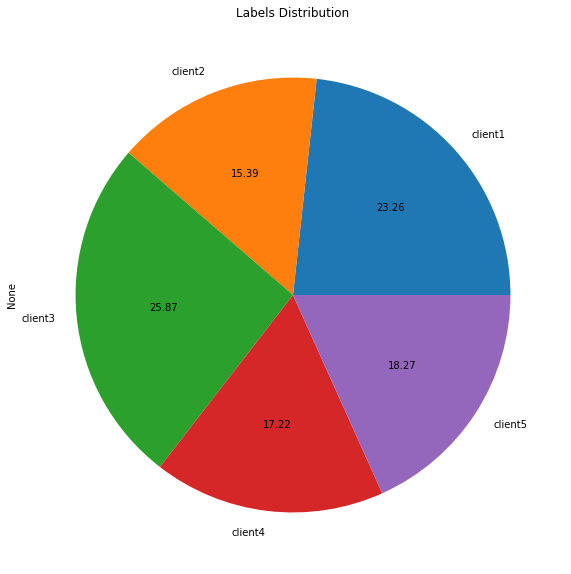

In [ ]:
# Plot the data instances percentage for each client
plt.title("Labels Distribution")
df_merged.groupby('client').size().plot(kind='pie', autopct='%.2f', figsize=(10,10))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Aplly Min-max normalization for each feature
def normalization(df_ori):
    df_rst = df_ori.groupby('target').apply(normalization_helper)
    return df_rst

def normalization_helper(sub_df):
    scaler = MinMaxScaler()
    col_list = sub_df.columns.tolist()
    for i in range(len(col_list) - 2):
        col_name = col_list[i]
        scaled_col = scaler.fit_transform(sub_df[col_name].values.reshape(-1,1))
        sub_df[col_name] = scaled_col
    return sub_df

df_normalized = normalization(df_ori=df_merged)

df_normalized.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.448627,0.000000,0.000000,0.000000,0.000000,0.000000,0.581253,0.470035,benign,client1
1,0.000000,0.211101,0.000000,0.000000,0.211400,0.000000,0.000000,0.213965,0.000000,0.000000,...,0.448627,0.005781,0.201605,0.006917,0.201605,0.000046,0.581253,0.470035,benign,client1
2,0.010955,0.215739,0.000073,0.007908,0.215912,0.000076,0.004501,0.218399,0.000076,0.001615,...,0.448627,0.007117,0.204045,0.013267,0.204045,0.000170,0.581253,0.470035,benign,client1
3,0.000000,0.198895,0.000000,0.000000,0.199176,0.000000,0.000000,0.201593,0.000000,0.000000,...,0.448627,0.000000,0.196454,0.000000,0.196454,0.000000,0.581253,0.470035,benign,client1
4,0.008686,0.080521,0.037591,0.006881,0.088127,0.040148,0.004297,0.096914,0.040639,0.001607,...,0.448627,0.000000,0.000000,0.000000,0.000000,0.000000,0.581253,0.470035,benign,client1


In [ ]:
df_client = df_normalized.sample(frac=1, random_state=42, axis=0).reset_index(drop=True)
df_client.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,0.000882,0.004547,1.061163e-05,0.002266,0.005244,4.035049e-05,0.005007,0.007116,1.264442e-04,0.015243,...,0.448627,0.023649,0.004255,8.516872e-08,0.039827,0.000458,0.581253,0.470035,benign,client3
1,0.143175,0.923129,2.844967e-01,0.187705,0.817384,6.132709e-01,0.332551,0.735498,9.249250e-01,0.520727,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,mirai_udp,client4
2,0.215386,0.835195,2.846743e-01,0.221013,0.673042,7.153496e-01,0.276447,0.340406,8.764978e-01,0.386094,...,0.000000,0.000000,0.291667,0.000000e+00,0.291667,0.000000,0.000000,0.000000,mirai_syn,client4
3,0.361131,0.714834,8.158901e-01,0.455403,0.672679,8.882172e-01,0.662679,0.752109,9.089640e-01,0.914768,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,mirai_udp,client3
4,0.025538,0.021541,1.848291e-18,0.017340,0.021571,7.720750e-17,0.009282,0.021832,6.035961e-08,0.007250,...,0.448627,0.004173,0.020600,7.732184e-03,0.033632,0.000058,0.581252,0.458546,benign,client4


In [ ]:
# Conver the string target labels to number, 0 for benign, 1 for mirai_ack and so on
def covert_target_to_num_val(df):
    target_seq_list = ['benign', 'mirai_ack', 'mirai_scan', 'mirai_syn', 'mirai_udp']
    df['target']=df['target'].apply(lambda x : target_seq_list.index(x))
    return df

df_client= covert_target_to_num_val(df=df_client)
df_client.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
0,0.000882,0.004547,1.061163e-05,0.002266,0.005244,4.035049e-05,0.005007,0.007116,1.264442e-04,0.015243,...,0.448627,0.023649,0.004255,8.516872e-08,0.039827,0.000458,0.581253,0.470035,0,client3
1,0.143175,0.923129,2.844967e-01,0.187705,0.817384,6.132709e-01,0.332551,0.735498,9.249250e-01,0.520727,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,4,client4
2,0.215386,0.835195,2.846743e-01,0.221013,0.673042,7.153496e-01,0.276447,0.340406,8.764978e-01,0.386094,...,0.000000,0.000000,0.291667,0.000000e+00,0.291667,0.000000,0.000000,0.000000,3,client4
3,0.361131,0.714834,8.158901e-01,0.455403,0.672679,8.882172e-01,0.662679,0.752109,9.089640e-01,0.914768,...,0.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,4,client3
4,0.025538,0.021541,1.848291e-18,0.017340,0.021571,7.720750e-17,0.009282,0.021832,6.035961e-08,0.007250,...,0.448627,0.004173,0.020600,7.732184e-03,0.033632,0.000058,0.581252,0.458546,0,client4


In [ ]:
# From the merged dataset split to each client dataframe 

df_client1 = df_client[df_client['client'] == 'client1']
df_client2 = df_client[df_client['client'] == 'client2']
df_client3 = df_client[df_client['client'] == 'client3']
df_client4 = df_client[df_client['client'] == 'client4']
df_client5 = df_client[df_client['client'] == 'client5']

df_clients_list = []

df_clients_list.append(df_client1)
df_clients_list.append(df_client2)
df_clients_list.append(df_client3)
df_clients_list.append(df_client4)
df_clients_list.append(df_client5)

df_clients_list[1]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
6,0.336081,2.613672e-06,0.000028,0.320875,0.000027,0.000901,0.467263,0.000146,0.004524,0.813879,...,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2,client2
12,0.375477,9.249611e-01,0.178256,0.423540,0.878717,0.429475,0.553701,0.797550,0.725040,0.741375,...,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3,client2
25,0.344775,6.573368e-01,0.497118,0.389454,0.742966,0.617467,0.581667,0.790478,0.642290,0.761627,...,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3,client2
36,0.641389,9.395105e-01,0.228679,0.727560,0.897518,0.391081,0.843436,0.939098,0.609063,0.861804,...,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4,client2
46,0.349291,8.656528e-01,0.455133,0.432693,0.819792,0.599427,0.674783,0.886046,0.711179,0.950351,...,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4,client2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3126571,0.529833,1.160798e-07,0.000002,0.474946,0.000004,0.000251,0.565729,0.000074,0.004599,0.845618,...,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2,client2
3126576,0.643962,8.255844e-01,0.575528,0.749677,0.780136,0.685557,0.872898,0.747890,0.753616,0.926877,...,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,1,client2
3126578,0.360641,7.995970e-01,0.338674,0.434537,0.775080,0.562796,0.597507,0.762867,0.701540,0.739116,...,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3,client2
3126582,0.368300,7.379947e-01,0.774011,0.430993,0.783207,0.693546,0.662547,0.895742,0.697262,0.962946,...,0.0,0.0,4.163336e-17,0.0,4.163336e-17,0.0,0.0,0.0,4,client2


In [ ]:
df_clients_partial_list = []
# In this step, randomly sample 20% of data for each client dataframe
for i in range(len(df_clients_list)):
    df_client = df_clients_list[i]
    df_client_partial = df_client.sample(frac=0.2, random_state=1)
    df_clients_partial_list.append(df_client_partial)

df_clients_partial_list[i]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target,client
2298236,0.563006,0.477450,0.997680,0.497114,0.515275,0.999222,0.455666,0.620349,0.994286,0.538898,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5
1921852,0.344250,0.342060,0.899948,0.360928,0.408057,0.963511,0.433791,0.578700,0.999654,0.571206,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5
2681313,0.663340,0.000184,0.001402,0.624770,0.000185,0.004438,0.642304,0.000237,0.007385,0.857924,...,0.000000,0.000000,2.775558e-17,0.000000,2.775558e-17,0.000000,0.000000,0.000000,2,client5
818728,0.159848,0.854991,0.496805,0.216080,0.742791,0.775653,0.350638,0.699407,0.955331,0.549307,...,0.000000,0.000000,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,4,client5
2462577,0.666282,0.084799,0.118098,0.555174,0.083480,0.120576,0.376101,0.082043,0.116642,0.167548,...,0.448627,0.002676,1.607589e-01,0.449972,1.674234e-01,0.196007,0.581253,0.470035,0,client5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315567,0.307679,0.000002,0.000018,0.346666,0.000018,0.000569,0.478305,0.000179,0.006790,0.831229,...,0.000000,0.000000,2.775558e-17,0.000000,2.775558e-17,0.000000,0.000000,0.000000,2,client5
1843661,0.123404,0.967746,0.029330,0.152756,0.982058,0.048679,0.301782,0.914059,0.304744,0.390946,...,0.000000,0.000000,2.916667e-01,0.000000,2.916667e-01,0.000000,0.000000,0.000000,3,client5
696284,0.286408,0.912262,0.319883,0.291152,0.865153,0.485798,0.368338,0.791814,0.861489,0.530694,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5
25307,0.203859,0.383164,0.945181,0.285781,0.466235,0.994205,0.471189,0.642535,0.987158,0.590048,...,0.000000,0.000000,4.163336e-17,0.000000,4.163336e-17,0.000000,0.000000,0.000000,4,client5


In [ ]:
# Counts the number of instances for each client before traning
df_counts = pd.concat(df_clients_partial_list)
df_counts['client'].value_counts()

client3    110639
client1    100361
client5     84938
client4     66354
client2     60833
Name: client, dtype: int64

In [ ]:
# Drop the col client because we will not use it in training
df_clients_list_dropped = []
for clients in df_rst:
    clients_dropped = clients.drop('client', axis=1)
    df_clients_list_dropped.append(clients_dropped)

df_clients_list_dropped[0]

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,target
0,0.165720,0.000001,0.000016,0.200677,0.000016,0.000559,0.449677,0.000072,0.002389,0.941000,...,0.0,0.0,0.0,2.775558e-17,0.0,2.775558e-17,0.0,0.0,0.0,2
1,0.310631,0.920064,0.295457,0.400588,0.846188,0.539621,0.626833,0.835091,0.801753,0.907290,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
2,0.297369,0.874485,0.440116,0.393043,0.799141,0.657529,0.626608,0.811440,0.836461,0.907568,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
3,0.513441,0.419354,0.973874,0.555361,0.488623,0.999052,0.700484,0.684309,0.966005,0.949875,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
4,0.313615,0.938567,0.231988,0.391245,0.865409,0.486427,0.611636,0.842575,0.790050,0.907263,...,0.0,0.0,0.0,1.000000e+00,0.0,1.000000e+00,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475872,0.473693,0.334347,0.505411,0.474806,0.450858,0.805182,0.590451,0.590553,0.937878,0.587513,...,0.0,0.0,0.0,2.220446e-16,0.0,2.220446e-16,0.0,0.0,0.0,3
499293,0.354403,0.657143,0.497269,0.413304,0.641119,0.746263,0.580650,0.650729,0.883319,0.716435,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3
464275,0.504212,0.386493,0.537103,0.502117,0.479392,0.811429,0.606937,0.601585,0.929525,0.612011,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3
165132,0.386003,0.634081,0.514017,0.432063,0.628615,0.757397,0.586079,0.649363,0.884545,0.752741,...,0.0,0.0,0.0,2.916667e-01,0.0,2.916667e-01,0.0,0.0,0.0,3


In [ ]:
for i in range (len(df_clients_list_dropped)):
    df_clients_list_dropped[i].to_csv(f'client{i + 1}_processed.csv', index=False)

In [ ]:
# Achieve list of name for all csv files
g = os.walk("/content/ProcessedDataset")
file_path_list = []
df_processed_list = []
for path,dir_list,file_list in g:
    file_list.sort()
    for j in range(len(file_list)):
        print(file_list[j])
        df_processed = read_csv_files("/content/ProcessedDataset/" + file_list[j])
        df_processed_list.append(df_processed)

client1_processed.csv
client2_processed.csv
client3_processed.csv
client4_processed.csv
client5_processed.csv
